In [ ]:
# Tratamiento de datos
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
# StandardScaler(): Normaliza los datos restando el promedio y dividiendo sobre la desviación estándar en cada variable (Z-Score).
from sklearn.preprocessing import StandardScaler,LabelEncoder

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
#Montar google drive para guardar la informacion
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

In [ ]:
import os
base_dir = "/content/gdrive/My Drive/Colab Notebooks/data/"
print(base_dir)

In [ ]:
# Datos
# ==============================================================================
equipos = ["Texas","Boston","Detroit","Kansas","St.","New_S.","New_Y.",
           "Milwaukee","Colorado","Houston","Baltimore","Los_An.","Chicago",
           "Cincinnati","Los_P.","Philadelphia","Chicago","Cleveland","Arizona",
           "Toronto","Minnesota","Florida","Pittsburgh","Oakland","Tampa",
           "Atlanta","Washington","San.F","San.I","Seattle"]
bateos = [5659,  5710, 5563, 5672, 5532, 5600, 5518, 5447, 5544, 5598,
          5585, 5436, 5549, 5612, 5513, 5579, 5502, 5509, 5421, 5559,
          5487, 5508, 5421, 5452, 5436, 5528, 5441, 5486, 5417, 5421]

runs = [855, 875, 787, 730, 762, 718, 867, 721, 735, 615, 708, 644, 654, 735,
        667, 713, 654, 704, 731, 743, 619, 625, 610, 645, 707, 641, 624, 570,
        593, 556]

# Creacion del dataframe
datos = pd.DataFrame({'equipos': equipos, 'bateos': bateos, 'runs': runs})
datos.head()

In [ ]:
datos.info()

In [ ]:
datos.runs.std()

In [ ]:
datos.runs.mean()

In [ ]:
# Descriptivas de los datos
datos.describe()

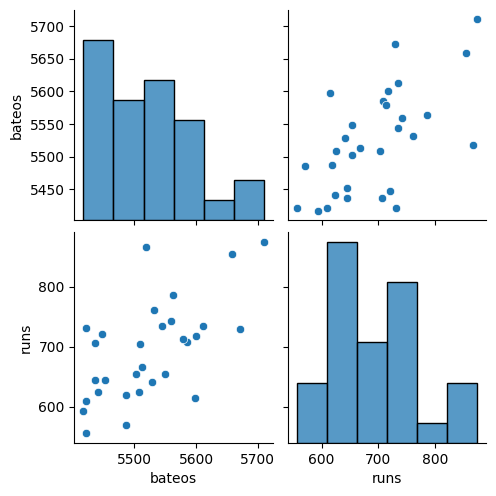

In [ ]:
# Analisis multivariado
sns.pairplot(datos)

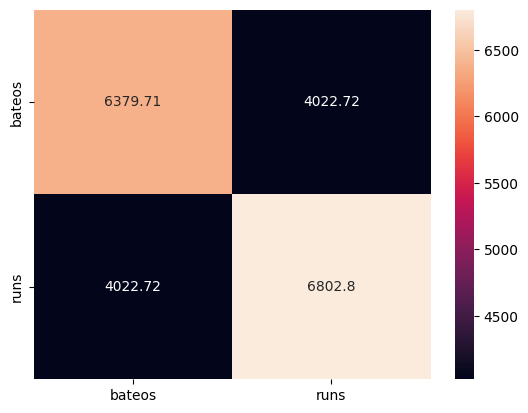

In [ ]:
cov = np.cov (datos.bateos, datos.runs)
labs = ['bateos', 'runs']

sns.heatmap (cov, annot = True, fmt = 'g', xticklabels = labs, yticklabels = labs)
plt.show ()

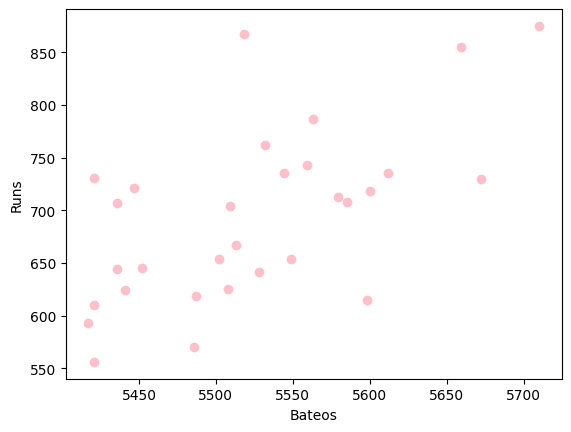

In [ ]:
# Grafiquemos los datos del dataset
plt.ylabel("Runs")
plt.xlabel("Bateos")
plt.scatter(datos["bateos"], datos["runs"], color="pink")
plt.show()

In [ ]:
# Correlación lineal entre las dos variables
from scipy.stats import pearsonr
# ==============================================================================
corr_test = pearsonr(x = datos['bateos'], y =  datos['runs'])
print("Coeficiente de correlación de Pearson: ", corr_test[0])
print("P-value: ", corr_test[1])

Coeficiente de correlación de Pearson:  0.6106270467206688
P-value:  0.0003388351359791978


El gráfico y el test de correlación muestran una relación lineal, de intensidad considerable (**r = 0.61**) y significativa (**p-value = 0.000339**). Tiene sentido intentar generar un modelo de regresión lineal con el objetivo de predecir el número de runs en función del número de bateos del equipo

In [ ]:
# División de los datos en train y test
from sklearn.model_selection import train_test_split
# ==============================================================================
X = datos[['bateos']]
y = datos['runs']

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

X_train.count()

bateos    24
dtype: int64

In [ ]:
# Estandarizamos los datos de entrenamiento y prueba
from sklearn.preprocessing import StandardScaler
scaler_bateos = StandardScaler()
X_train_sc = scaler_bateos.fit_transform(X_train)
#y_train_sc = scaler_bateos.fit_transform(y_train)
X_test_sc = scaler_bateos.fit_transform(X_test)
#y_test_sc = scaler_bateos.fit_transform(y_test)

X_train_sc
X_test_sc

array([[-0.9645908 ],
       [ 0.47967897],
       [-0.07500435],
       [ 1.78789435],
       [-1.27856249],
       [ 0.05058433]])

In [ ]:
from sklearn import linear_model
modelo = linear_model.LinearRegression()
modelo.fit(X_train,y_train)
#LinearRegression()
modelo.coef_

NameError: name 'X_train' is not defined

Intersepto (b) -2367.702841302211
Pendiente (m) [0.55287135]


[[5400], [5450], [5650], [5700]]
[617.80246732 645.44603499 756.02030568 783.66387335]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


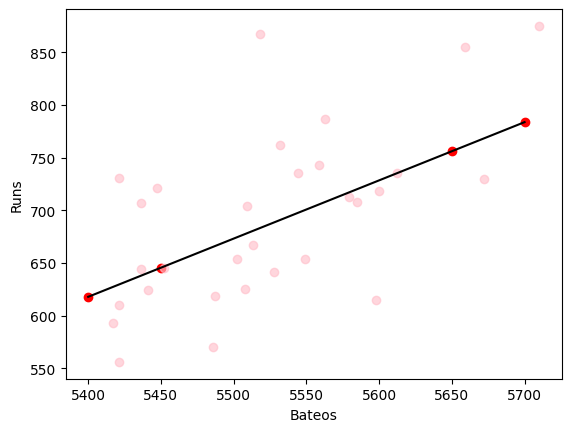

In [ ]:
from sklearn import linear_model
# Creación del modelo
# ==============================================================================

# Información del modelo
# ==============================================================================
print("Intersepto (b)", modelo.intercept_)
print("Pendiente (m)", modelo.coef_)

entrada= [[5400], [5450], [5650], [5700]]
print('\n')
print(entrada)
print(modelo.predict(entrada))


plt.scatter(entrada, modelo.predict(entrada), color="red")
plt.plot(entrada, modelo.predict(entrada), color="black")

plt.ylabel("Runs")
plt.xlabel("Bateos")
plt.scatter(X, y, color="pink", alpha=0.65)
plt.show()

# **Error absoluto máximo (M)** OK

In [ ]:
from sklearn.metrics import max_error

predicciones = modelo.predict(X = X_test)
print(predicciones[0:5,])

M = max_error(
        y_true  = y_test,
        y_pred  = predicciones,
              )
print("")
print(f"El Error absoluto máximo (M) de test es: {M}")


[643.78742093 720.0836677  690.78148597 789.19258689 627.20128033]

El Error absoluto máximo (M) de test es: 85.80741311428164


# **Error absoluto medio (mean absolute error - MAE)** OK

In [ ]:
from sklearn.metrics import mean_absolute_error

predicciones = modelo.predict(X = X_test)
print(predicciones[0:5,])

MAE = mean_absolute_error(
        y_true  = y_test,
        y_pred  = predicciones,
              )
print("")
print(f"El Error absoluto medio (MAE) de test es: {MAE}")


[643.78742093 720.0836677  690.78148597 789.19258689 627.20128033]

El Error absoluto medio (MAE) de test es: 53.01791867170505


# **Error cuadrático medio (mean squared error - MSE)** OK

In [ ]:
from sklearn.metrics import mean_squared_error
# Error de test del modelo

# ==============================================================================
predicciones = modelo.predict(X = X_test)
print(predicciones[0:5,])

mse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = True
       )
print("")
print(f"El Error cuadrático medio (mse) de test es: {mse}")

[643.78742093 720.0836677  690.78148597 789.19258689 627.20128033]

El Error cuadrático medio (mse) de test es: 3520.8458755573306


# **Raíz cuadrada del error cuadrático medio (RMSE)** OK

In [ ]:
from sklearn.metrics import mean_squared_error
# Error de test del modelo

# ==============================================================================
predicciones = modelo.predict(X = X_test)
print(predicciones[0:5,])

rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )
print("")
print(f"El Error de raíz cuadrada del error cuadrático medio (rmse) de test es: {rmse}")

[643.78742093 720.0836677  690.78148597 789.19258689 627.20128033]

El Error de raíz cuadrada del error cuadrático medio (rmse) de test es: 59.336716083360486


# **Suma de los cuadrados de los residuos (RSS)** OK

In [ ]:
from sklearn.metrics import mean_squared_error

predicciones = modelo.predict(X = X_test)
print(predicciones[0:5,])

RSS = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones
              )
RSS1 =RSS*len(predicciones)
print("")
print(f"La Suma de los cuadrados de los residuos (RSS) de test es: {RSS1}")

[643.78742093 720.0836677  690.78148597 789.19258689 627.20128033]

La Suma de los cuadrados de los residuos (RSS) de test es: 21125.075253343985


# **$R^2$ (Coeficiente de determinación)**

In [ ]:
from sklearn.metrics import r2_score

predicciones = modelo.predict(X = X_test)
print(predicciones[0:5,])

RR = r2_score(
        y_true  = y_test,
        y_pred  = predicciones
              )
print("")
print(f"El Coeficiente de determinación (R^2) de test es: {RR}")

[643.78742093 720.0836677  690.78148597 789.19258689 627.20128033]

El Coeficiente de determinación (R^2) de test es: 0.4894282764285326


_____________________________________
# **Dataset Ingreso Vs Horas Trabajadas**
_____________________________________

In [ ]:
#Leer un archivo ingreso desde el google Drive

print(base_dir)

ingreso = pd.read_csv(base_dir + "ingreso.csv")

ingreso.head()
# Tenemos 2 columnas el ingreso y el promedio de horas trabajadas

/content/gdrive/My Drive/Colab Notebooks/data/


,ingreso,horas
0,9973.577534,40.905476
1,8961.047249,41.576483
2,7437.977263,41.369239
3,12064.915290,41.537211
4,9296.396167,40.441203


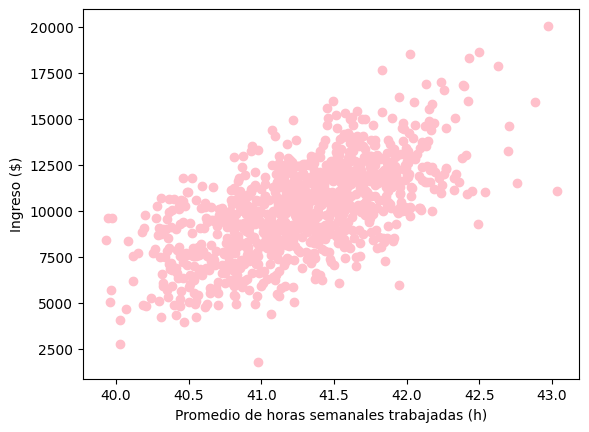

In [ ]:
# Grafiquemos los datos del dataset
plt.ylabel("Ingreso ($)")
plt.xlabel("Promedio de horas semanales trabajadas (h)")
plt.scatter(ingreso["horas"], ingreso["ingreso"], color="pink")
plt.show()

In [ ]:
# Correlación lineal entre las dos variables
from scipy.stats import pearsonr
# ==============================================================================
corr_test = pearsonr(x = ingreso["horas"], y =  ingreso["ingreso"])
print("Coeficiente de correlación de Pearson: ", corr_test[0])
print("P-value: ", corr_test[1])

Coeficiente de correlación de Pearson:  0.6255135991784887
P-value:  1.0820784245821837e-109


In [ ]:
# División de los datos en train y test
from sklearn.model_selection import train_test_split
# ==============================================================================
X = ingreso['horas']
y = ingreso['ingreso']

X_train, X_test, y_train, y_test = train_test_split(
                                        X.values.reshape(-1,1),
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )


# **Creación del Modelo de Regresión Lineal Simple**

Intersepto (b) [-114034.74829417]
Pendiente (m) [[3008.26827534]]


[[39.5], [40], [43], [43.5]]
[[ 4791.84858158]
 [ 6295.98271925]
 [15320.78754526]
 [16824.92168293]]


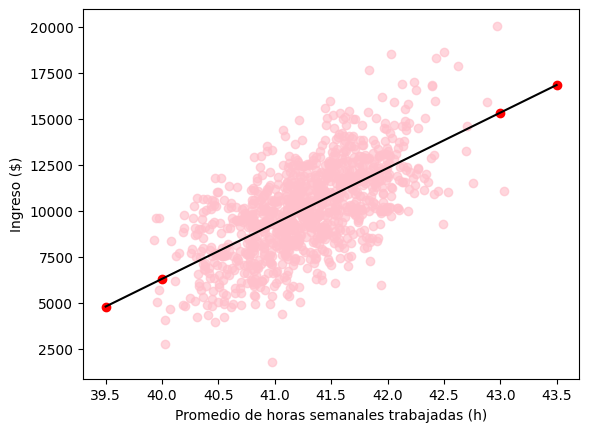

In [ ]:
from sklearn import linear_model
# Creación del modelo
# ==============================================================================
modelo = linear_model.LinearRegression()
modelo.fit(X = X_train.reshape(-1, 1), y = y_train)

# Información del modelo
# ==============================================================================
print("Intersepto (b)", modelo.intercept_)
print("Pendiente (m)", modelo.coef_)

entrada= [[39.5], [40], [43], [43.5]]
print('\n')
print(entrada)
print(modelo.predict(entrada))


plt.scatter(entrada, modelo.predict(entrada), color="red")
plt.plot(entrada, modelo.predict(entrada), color="black")

plt.ylabel("Ingreso ($)")
plt.xlabel("Promedio de horas semanales trabajadas (h)")
plt.scatter(X, y, color="pink", alpha=0.65)
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error

predicciones = modelo.predict(X = X_test)
print(predicciones[0:5,])

MAE = mean_absolute_error(
        y_true  = y_test,
        y_pred  = predicciones,
              )
print("")
print(f"El Error absoluto medio (MAE) de test es: {MAE}")

[[11037.35950211]
 [12039.04133126]
 [ 9741.27584465]
 [12837.78285562]
 [11058.53046085]]

El Error absoluto medio (MAE) de test es: 1513.7696374411953


**Supóngase que el departamento de ventas de una empresa quiere estudiar la influencia que tiene la publicidad a través de distintos canales sobre el número de ventas de un producto. Se dispone de un conjunto de datos que contiene los ingresos (en millones) conseguido por ventas en 200 regiones, así como la cantidad de presupuesto, también en millones, destinado a anuncios por radio, TV y periódicos en cada una de ellas.**

In [ ]:
# Datos
# ==============================================================================
tv = [230.1, 44.5, 17.2, 151.5, 180.8, 8.7, 57.5, 120.2, 8.6, 199.8, 66.1, 214.7,
      23.8, 97.5, 204.1, 195.4, 67.8, 281.4, 69.2, 147.3, 218.4, 237.4, 13.2,
      228.3, 62.3, 262.9, 142.9, 240.1, 248.8, 70.6, 292.9, 112.9, 97.2, 265.6,
      95.7, 290.7, 266.9, 74.7, 43.1, 228.0, 202.5, 177.0, 293.6, 206.9, 25.1,
      175.1, 89.7, 239.9, 227.2, 66.9, 199.8, 100.4, 216.4, 182.6, 262.7, 198.9,
      7.3, 136.2, 210.8, 210.7, 53.5, 261.3, 239.3, 102.7, 131.1, 69.0, 31.5,
      139.3, 237.4, 216.8, 199.1, 109.8, 26.8, 129.4, 213.4, 16.9, 27.5, 120.5,
      5.4, 116.0, 76.4, 239.8, 75.3, 68.4, 213.5, 193.2, 76.3, 110.7, 88.3, 109.8,
      134.3, 28.6, 217.7, 250.9, 107.4, 163.3, 197.6, 184.9, 289.7, 135.2, 222.4,
      296.4, 280.2, 187.9, 238.2, 137.9, 25.0, 90.4, 13.1, 255.4, 225.8, 241.7, 175.7,
      209.6, 78.2, 75.1, 139.2, 76.4, 125.7, 19.4, 141.3, 18.8, 224.0, 123.1, 229.5,
      87.2, 7.8, 80.2, 220.3, 59.6, 0.7, 265.2, 8.4, 219.8, 36.9, 48.3, 25.6, 273.7,
      43.0, 184.9, 73.4, 193.7, 220.5, 104.6, 96.2, 140.3, 240.1, 243.2, 38.0, 44.7,
      280.7, 121.0, 197.6, 171.3, 187.8, 4.1, 93.9, 149.8, 11.7, 131.7, 172.5, 85.7,
      188.4, 163.5, 117.2, 234.5, 17.9, 206.8, 215.4, 284.3, 50.0, 164.5, 19.6, 168.4,
      222.4, 276.9, 248.4, 170.2, 276.7, 165.6, 156.6, 218.5, 56.2, 287.6, 253.8, 205.0,
      139.5, 191.1, 286.0, 18.7, 39.5, 75.5, 17.2, 166.8, 149.7, 38.2, 94.2, 177.0,
      283.6, 232.1]

radio = [37.8, 39.3, 45.9, 41.3, 10.8, 48.9, 32.8, 19.6, 2.1, 2.6, 5.8, 24.0, 35.1,
         7.6, 32.9, 47.7, 36.6, 39.6, 20.5, 23.9, 27.7, 5.1, 15.9, 16.9, 12.6, 3.5,
         29.3, 16.7, 27.1, 16.0, 28.3, 17.4, 1.5, 20.0, 1.4, 4.1, 43.8, 49.4, 26.7,
         37.7, 22.3, 33.4, 27.7, 8.4, 25.7, 22.5, 9.9, 41.5, 15.8, 11.7, 3.1, 9.6,
         41.7, 46.2, 28.8, 49.4, 28.1, 19.2, 49.6, 29.5, 2.0, 42.7, 15.5, 29.6, 42.8,
         9.3, 24.6, 14.5, 27.5, 43.9, 30.6, 14.3, 33.0, 5.7, 24.6, 43.7, 1.6, 28.5,
         29.9, 7.7, 26.7, 4.1, 20.3, 44.5, 43.0, 18.4, 27.5, 40.6, 25.5, 47.8, 4.9,
         1.5, 33.5, 36.5, 14.0, 31.6, 3.5, 21.0, 42.3, 41.7, 4.3, 36.3, 10.1, 17.2,
         34.3, 46.4, 11.0, 0.3, 0.4, 26.9, 8.2, 38.0, 15.4, 20.6, 46.8, 35.0, 14.3,
         0.8, 36.9, 16.0, 26.8, 21.7, 2.4, 34.6, 32.3, 11.8, 38.9, 0.0, 49.0, 12.0,
         39.6, 2.9, 27.2, 33.5, 38.6, 47.0, 39.0, 28.9, 25.9, 43.9, 17.0, 35.4, 33.2,
         5.7, 14.8, 1.9, 7.3, 49.0, 40.3, 25.8, 13.9, 8.4, 23.3, 39.7, 21.1, 11.6, 43.5,
         1.3, 36.9, 18.4, 18.1, 35.8, 18.1, 36.8, 14.7, 3.4, 37.6, 5.2, 23.6, 10.6, 11.6,
         20.9, 20.1, 7.1, 3.4, 48.9, 30.2, 7.8, 2.3, 10.0, 2.6, 5.4, 5.7, 43.0, 21.3, 45.1,
         2.1, 28.7, 13.9, 12.1, 41.1, 10.8, 4.1, 42.0, 35.6, 3.7, 4.9, 9.3, 42.0, 8.6]

periodico = [69.2, 45.1, 69.3, 58.5, 58.4, 75.0, 23.5, 11.6, 1.0, 21.2, 24.2, 4.0,
             65.9, 7.2, 46.0, 52.9, 114.0, 55.8, 18.3, 19.1, 53.4, 23.5, 49.6, 26.2,
             18.3, 19.5, 12.6, 22.9, 22.9, 40.8, 43.2, 38.6, 30.0, 0.3, 7.4, 8.5, 5.0,
             45.7, 35.1, 32.0, 31.6, 38.7, 1.8, 26.4, 43.3, 31.5, 35.7, 18.5, 49.9,
             36.8, 34.6, 3.6, 39.6, 58.7, 15.9, 60.0, 41.4, 16.6, 37.7, 9.3, 21.4, 54.7,
             27.3, 8.4, 28.9, 0.9, 2.2, 10.2, 11.0, 27.2, 38.7, 31.7, 19.3, 31.3, 13.1,
             89.4, 20.7, 14.2, 9.4, 23.1, 22.3, 36.9, 32.5, 35.6, 33.8, 65.7, 16.0, 63.2,
             73.4, 51.4, 9.3, 33.0, 59.0, 72.3, 10.9, 52.9, 5.9, 22.0, 51.2, 45.9, 49.8,
             100.9, 21.4, 17.9, 5.3, 59.0, 29.7, 23.2, 25.6, 5.5, 56.5, 23.2, 2.4, 10.7,
             34.5, 52.7, 25.6, 14.8, 79.2, 22.3, 46.2, 50.4, 15.6, 12.4, 74.2, 25.9, 50.6,
             9.2, 3.2, 43.1, 8.7, 43.0, 2.1, 45.1, 65.6, 8.5, 9.3, 59.7, 20.5, 1.7, 12.9,
             75.6, 37.9, 34.4, 38.9, 9.0, 8.7, 44.3, 11.9, 20.6, 37.0, 48.7, 14.2, 37.7,
             9.5, 5.7, 50.5, 24.3, 45.2, 34.6, 30.7, 49.3, 25.6, 7.4, 5.4, 84.8, 21.6, 19.4,
             57.6, 6.4, 18.4, 47.4, 17.0, 12.8, 13.1, 41.8, 20.3, 35.2, 23.7, 17.6, 8.3,
             27.4, 29.7, 71.8, 30.0, 19.6, 26.6, 18.2, 3.7, 23.4, 5.8, 6.0, 31.6, 3.6, 6.0,
             13.8, 8.1, 6.4, 66.2, 8.7]

ventas = [22.1, 10.4, 9.3, 18.5, 12.9, 7.2, 11.8, 13.2, 4.8, 10.6, 8.6, 17.4, 9.2, 9.7,
          19.0, 22.4, 12.5, 24.4, 11.3, 14.6, 18.0, 12.5, 5.6, 15.5, 9.7, 12.0, 15.0, 15.9,
          18.9, 10.5, 21.4, 11.9, 9.6, 17.4, 9.5, 12.8, 25.4, 14.7, 10.1, 21.5, 16.6, 17.1,
          20.7, 12.9, 8.5, 14.9, 10.6, 23.2, 14.8, 9.7, 11.4, 10.7, 22.6, 21.2, 20.2, 23.7,
          5.5, 13.2, 23.8, 18.4, 8.1, 24.2, 15.7, 14.0, 18.0, 9.3, 9.5, 13.4, 18.9, 22.3,
          18.3, 12.4, 8.8, 11.0, 17.0, 8.7, 6.9, 14.2, 5.3, 11.0, 11.8, 12.3, 11.3, 13.6,
          21.7, 15.2, 12.0, 16.0, 12.9, 16.7, 11.2, 7.3, 19.4, 22.2, 11.5, 16.9, 11.7, 15.5,
          25.4, 17.2, 11.7, 23.8, 14.8, 14.7, 20.7, 19.2, 7.2, 8.7, 5.3, 19.8, 13.4, 21.8,
          14.1, 15.9, 14.6, 12.6, 12.2, 9.4, 15.9, 6.6, 15.5, 7.0, 11.6, 15.2, 19.7, 10.6,
          6.6, 8.8, 24.7, 9.7, 1.6, 12.7, 5.7, 19.6, 10.8, 11.6, 9.5, 20.8, 9.6, 20.7, 10.9,
          19.2, 20.1, 10.4, 11.4, 10.3, 13.2, 25.4, 10.9, 10.1, 16.1, 11.6, 16.6, 19.0, 15.6,
          3.2, 15.3, 10.1, 7.3, 12.9, 14.4, 13.3, 14.9, 18.0, 11.9, 11.9, 8.0, 12.2, 17.1,
          15.0, 8.4, 14.5, 7.6, 11.7, 11.5, 27.0, 20.2, 11.7, 11.8, 12.6, 10.5, 12.2, 8.7,
          26.2, 17.6, 22.6, 10.3, 17.3, 15.9, 6.7, 10.8, 9.9, 5.9, 19.6, 17.3, 7.6, 9.7, 12.8,
          25.5, 13.4]

datos = pd.DataFrame({'tv': tv, 'radio': radio, 'periodico':periodico, 'ventas': ventas})
datos.head(6)

,tv,radio,periodico,ventas
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
5,8.7,48.9,75.0,7.2


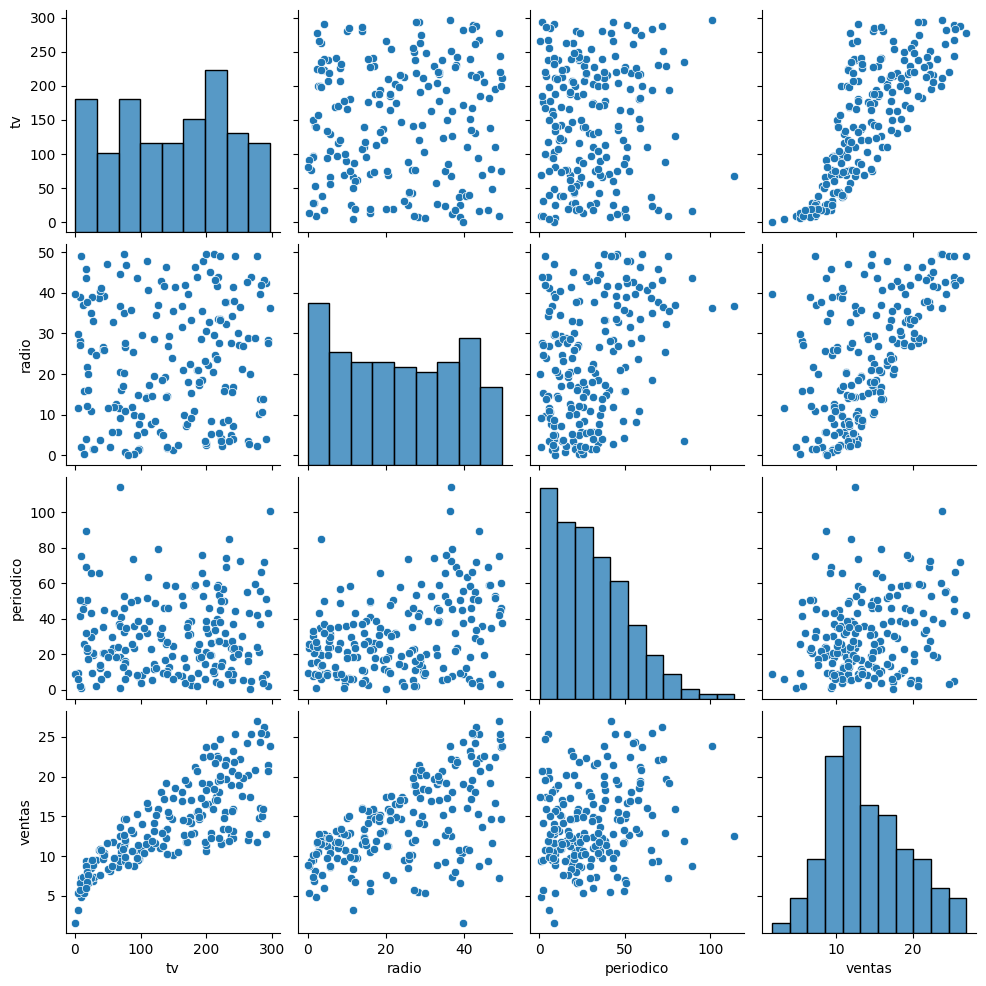

In [ ]:
sns.pairplot(datos)

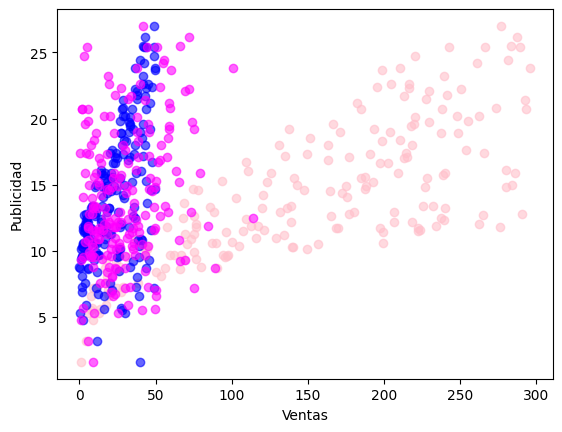

In [ ]:
X = datos[['tv', 'radio', 'periodico']]
y = datos['ventas']

# Grafiquemos los datos del dataset
plt.ylabel("Publicidad")
plt.xlabel("Ventas")
plt.scatter(datos['tv'], y, color="pink", alpha=0.6)
plt.scatter(datos['radio'], y, color="blue", alpha=0.6)
plt.scatter(datos['periodico'], y, color="magenta", alpha=0.6)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
# ==============================================================================
# División de los datos en train y test
# ==============================================================================

X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

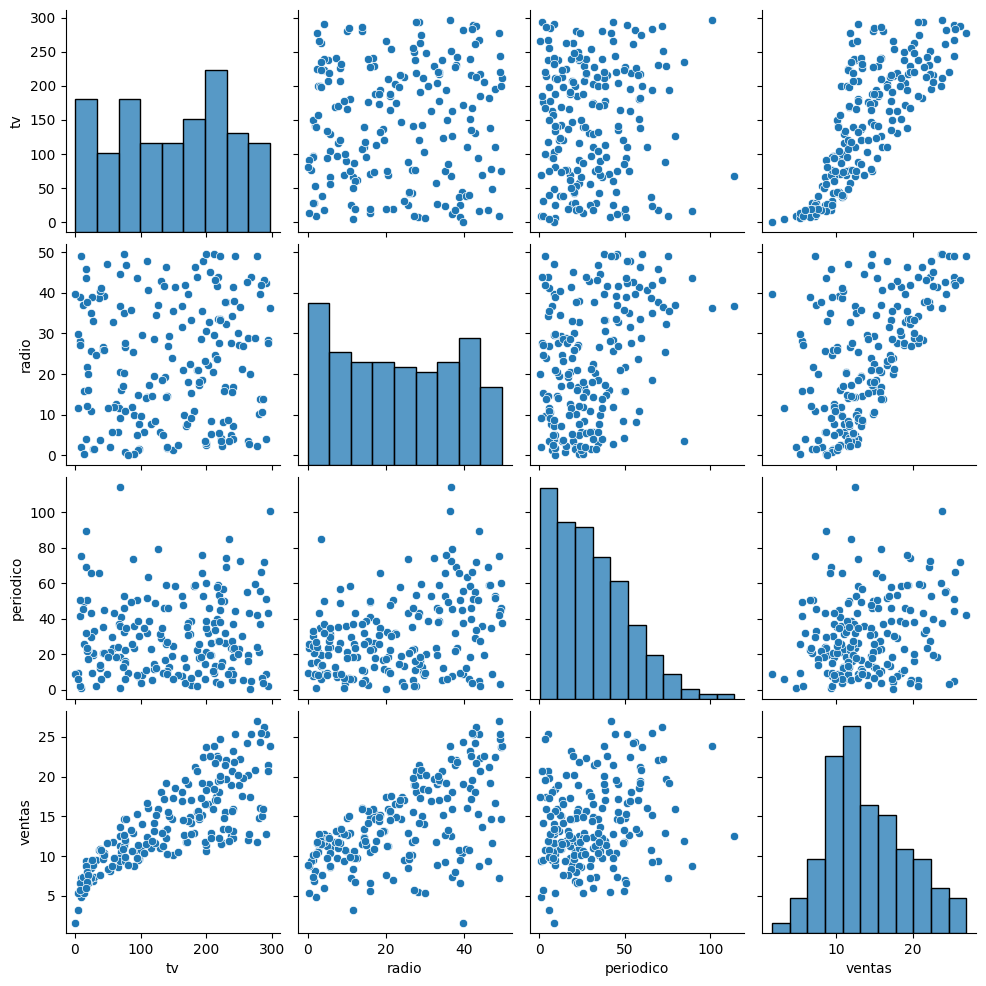

In [ ]:
sns.pairplot(datos)

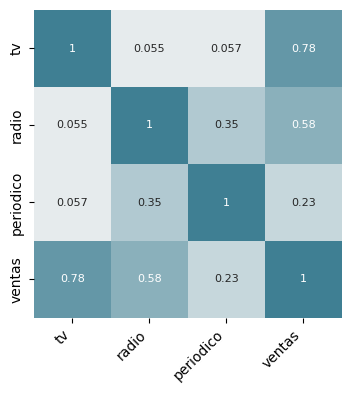

In [ ]:
# Correlación entre columnas numéricas
# ==============================================================================

def tidy_corr_matrix(corr_mat):
    '''
    Función para convertir una matriz de correlación de pandas en formato tidy
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)

    return(corr_mat)



corr_matrix = datos.select_dtypes(include=['float64', 'int']).corr(method='pearson')
tidy_corr_matrix(corr_matrix).head(10)


# Heatmap matriz de correlaciones
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4, 4))

sns.heatmap(
    corr_matrix,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 8},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 10)

## Ajuste del modelo


**Se ajusta un modelo lineal múltiple con el objetivo de predecir las ventas en función de la inversión en los tres canales de publicidad.**

In [ ]:
# Creación del modelo utilizando matrices como en scikitlearn
# ==============================================================================
# A la matriz de predictores se le tiene que añadir una columna de 1s para el intercept del modelo

X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.OLS(endog=y_train, exog=X_train,)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     437.8
Date:                Fri, 19 May 2023   Prob (F-statistic):           1.01e-75
Time:                        22:46:49   Log-Likelihood:                -308.29
No. Observations:                 160   AIC:                             624.6
Df Residuals:                     156   BIC:                             636.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.8497      0.365      7.803      0.0

El modelo con todas las variables introducidas como predictores tiene un  R2 alto (0.894), es capaz de explicar el 89.4% de la variabilidad observada en las ventas.
El p-value del modelo es significativo (1.01e-75) por lo que se puede aceptar que el modelo es mejor que lo esperado es por azar, al menos uno de los coeficientes parciales de regresión es distinto de 0.

Acorde al p-value obtenido para el coeficiente parcial de regresión de **periodico** (0.723), esta variable no contribuye de forma significativa al modelo.
*Se entrena de nuevo el modelo, pero esta vez excluyendo el predictor periodico*.

In [ ]:
# Creación del modelo utilizando matrices
# ==============================================================================
# Se elimina la columna periodico del conjunto de train y test
X_train = X_train.drop(columns = 'periodico')
X_test  = X_test.drop(columns = 'periodico')

# A la matriz de predictores se le tiene que añadir una columna de 1s para el
# intercept del modelo
X_train = sm.add_constant(X_train, prepend=True)
modelo  = sm.OLS(endog=y_train, exog=X_train,)
modelo  = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     660.3
Date:                Fri, 19 May 2023   Prob (F-statistic):           3.69e-77
Time:                        22:53:45   Log-Likelihood:                -308.36
No. Observations:                 160   AIC:                             622.7
Df Residuals:                     157   BIC:                             631.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9004      0.335      8.652      0.0

## **El modelo de regresión lineal múltiple**:

**ventas = 2.9004 + 0.0456tv + 0.1904radio**

Es capaz de explicar el 89.4% de la varianza observada en las ventas (R-squared: 0.894, Adj. R-squared: 0.892).
El test  F es significativo (p-value: 3.69e-77). Por lo que hay evidencias claras de que el modelo es capaz de explicar la varianza en las ventas mejor de lo esperado por azar.
Los test estadísticos para cada variable confirman que tv y radio están relacionadas con la cantidad de ventas y contribuyen al modelo.

No se satisfacen las condiciones de normalidad, por lo que los intervalos de confianza estimados para los coeficientes y las predicciones no son fiables.

El error (rmse) de test es de 1.696. Las predicciones del modelo final se alejan en promedio 1.696 unidades del valor real.

In [ ]:
# Diagnóstico errores (residuos) de las predicciones de entrenamiento
# ==============================================================================
y_train = y_train.flatten()
prediccion_train = modelo.predict(exog = X_train)
residuos_train   = prediccion_train - y_train

In [ ]:
# Predicciones con intervalo de confianza
# ==============================================================================
predicciones = modelo.get_prediction(exog = X_train).summary_frame(alpha=0.05)
predicciones.head(4)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
146,15.231643,0.248325,14.741154,15.722132,11.880621,18.582665
32,7.615382,0.247198,7.127119,8.103645,4.264685,10.966079
43,13.928155,0.213535,13.506384,14.349927,10.586500,17.269810
99,17.001020,0.210052,16.586127,17.415913,13.660226,20.341814


Una vez entrenado el modelo, se pueden obtener predicciones para nuevos datos. Los modelos de statsmodels permiten calcular los intervalos de confianza asociados a cada predicción.